In [47]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 27 11:32:26 2020

@author: cantin
"""

import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl


# Definition de l'intervalle ]-R,R[ + mesh size
R = 3.0
N = 59
#h = 2*R/(N+1)
X = np.linspace(-R,R,N)

# 1D Finite Difference Matrix
def Rig(Nvar):
    h = 2*R/(Nvar+1)
    Av = np.zeros((Nvar,Nvar))
################
    Av[0,0] = 2
    Av[Nvar-1,Nvar-1] = 2
    Av[0,1] = -1
    Av[1,0] = -1
    Av[Nvar-2,Nvar-1] = -1
    Av[Nvar-1,Nvar-2] = -1
    for i in range(1,Nvar-1):
        Av[i, i-1] = -1
        Av[i-1, i] = -1
        Av[i,i] = 2
    return (1/h**2)*Av

A = Rig(N)
A.shape

(59, 59)

In [48]:
A

array([[ 200., -100.,    0., ...,    0.,    0.,    0.],
       [-100.,  200., -100., ...,    0.,    0.,    0.],
       [   0., -100.,  200., ...,    0.,    0.,    0.],
       ...,
       [   0.,    0.,    0., ...,  200., -100.,    0.],
       [   0.,    0.,    0., ..., -100.,  200., -100.],
       [   0.,    0.,    0., ...,    0., -100.,  200.]])

In [49]:
eigval, eigvec = npl.eig(A)
idx = np.argsort(eigval)
eigval = eigval[idx]
eigvec = eigvec[:,idx]

# First Eigenvector
# Fixer le signe
U1 = eigvec[:,0]
if  U1[1]<0:
    U1 = - U1
    
# Second Eigenvector
# Norlaliser et fixer le signe
U2 = eigvec[:,1]
if  U2[1]<0:
    U2 = - U2 




# Plot Eigenvector and eigenvalues
################


# Potentiel trou
V0 = 10
a=1

################
        
        
    

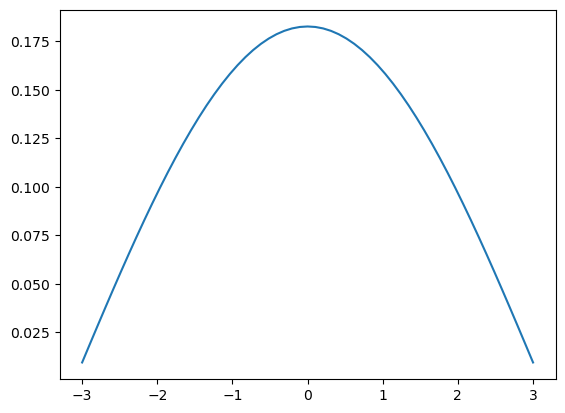

In [50]:
plt.plot(X,U1)

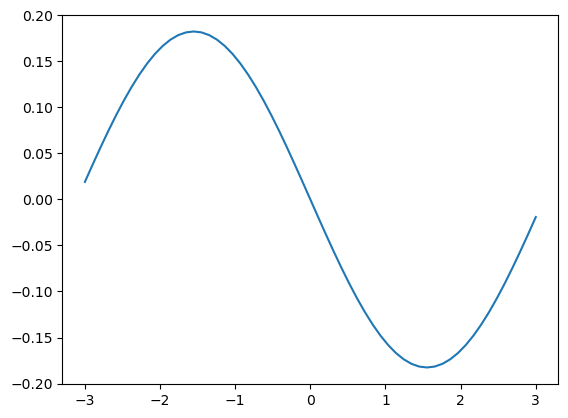

In [51]:
plt.plot(X,U2)

In [52]:
vec_prop_exact = np.zeros((N,np.size(X,0)))
for k in range(1,N+1):
    vec_prop_exact[k-1,:] = (1/np.sqrt(R))*np.sin((k*np.pi*(X + R))/(2*R))

E_exact = np.array([((k**2)*(np.pi**2))/(4*R**2) for k in range(1,N+1)])  # dans l'ordre croissant

In [53]:
def norm_exo(vec,borne1,borne2):
    dh = (borne2-borne1)/(len(vec))
    integrale = 0
    for i in range(len(vec)):
        integrale += dh*vec[i]**2
    return np.sqrt(integrale)

0.31889640207164033
0.9999999999999999
0.9914892069294691


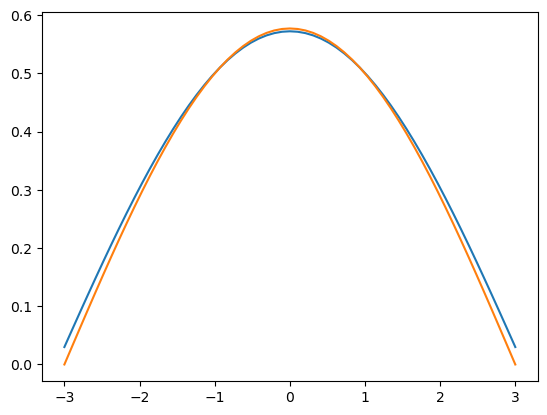

In [54]:
U1_exact = vec_prop_exact[0,:]
if  U1_exact[1]<0:
    U1_exact = - U1_exact

plt.plot(X,U1/norm_exo(U1,-R,R))
plt.plot(X,U1_exact)

print(norm_exo(U1,-R,R))
U1_norm = U1/norm_exo(U1,-R,R)
print(norm_exo(U1_norm,-R,R))
print(norm_exo(U1_exact,-R,R))

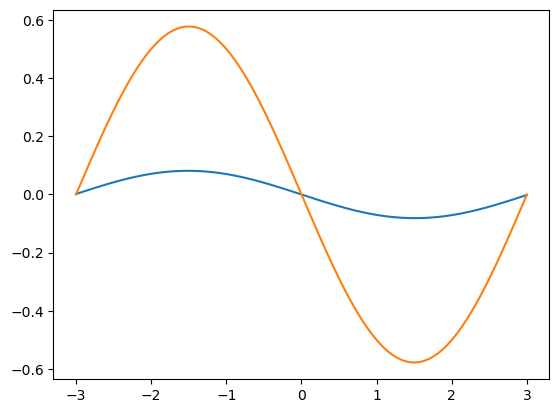

In [61]:
U2_exact = vec_prop_exact[1,:]
if  U2_exact[1]<0:
    U2_exact = - U2_exact

U2 = U2/npl.norm(U1)
plt.plot(X,U2)
plt.plot(X,U2_exact)

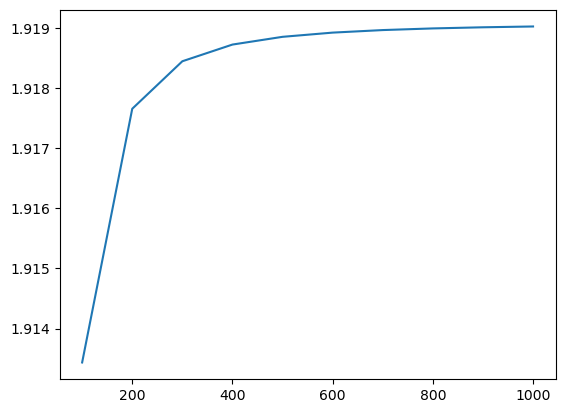

In [9]:
N_liste = np.array([100*i for i in range(1,11)])
A_liste = [Rig(N_liste[i]) for i in range(np.size(N_liste,0))]
ktest = 3

err = np.zeros(np.size(N_liste,0))
for indN in range(np.size(N_liste,0)):
    eigvalN, eigvecN = npl.eig(A_liste[indN])
    idxN = np.argsort(eigvalN)
    eigvalN = eigvalN[idxN]
    eigvecN = eigvecN[:,idxN]
    E_exactN = ((ktest**2)*(np.pi**2))/(4*R**2)
    err[indN] = np.abs(E_exactN - eigvalN[ktest])
plt.plot(N_liste, err)